<a href="https://colab.research.google.com/github/LogBlast/projectdata_group6/blob/notebook/project_group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project Submission - Group 6***

# 1) Data importation

In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score
)

df = pd.read_csv("online_gaming_behavior_dataset.csv")
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


# 2) Data cleaning

## a) Is null detection

*The dataset doesn't contain any null values because it's intended for data processing on Kaggle, and therefore must be cleaned and free of issues.*

In [65]:
df.isnull().sum()
display(df)
print("The dataset is already clean")

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


The dataset is already clean


## b) Preprocessing data

In [66]:
# float into int
float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].round().astype('int')

# column type object
cat_cols = df.select_dtypes(include='object').columns

# one-hot
df_dummies = pd.get_dummies(df[cat_cols], dtype=int)

# concat
df = pd.concat([df, df_dummies], axis=1)

display(df)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,...,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High,EngagementLevel_Low,EngagementLevel_Medium
0,9000,43,Male,Other,Strategy,16,0,Medium,6,108,...,0,0,0,1,0,0,1,0,0,1
1,9001,29,Female,USA,Strategy,6,0,Medium,5,144,...,0,0,0,1,0,0,1,0,0,1
2,9002,22,Female,USA,Sports,8,0,Easy,16,142,...,0,0,1,0,1,0,0,1,0,0
3,9003,35,Male,USA,Action,5,1,Easy,9,85,...,0,0,0,0,1,0,0,0,0,1
4,9004,33,Male,Europe,Action,16,0,Medium,2,131,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,21,0,Easy,4,75,...,0,0,0,1,1,0,0,0,0,1
40030,49030,44,Female,Other,Simulation,14,0,Hard,19,114,...,0,1,0,0,0,1,0,1,0,0
40031,49031,15,Female,USA,RPG,0,1,Easy,10,176,...,1,0,0,0,1,0,0,1,0,0
40032,49032,34,Male,USA,Sports,14,1,Medium,3,128,...,0,0,1,0,0,0,1,0,0,1


# 3) Data Visualization

## a) 'data' distribution

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

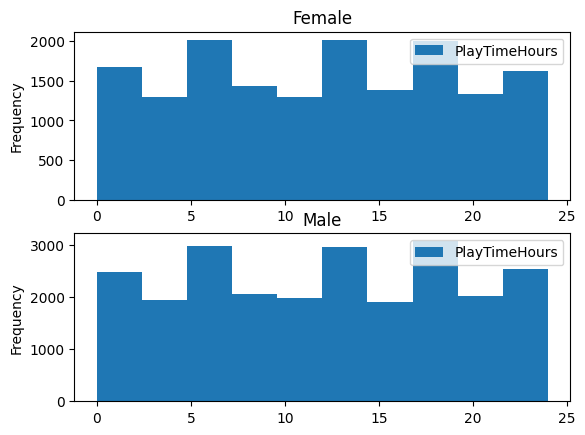

In [67]:
df.plot.hist(by="Gender", column=["PlayTimeHours"])

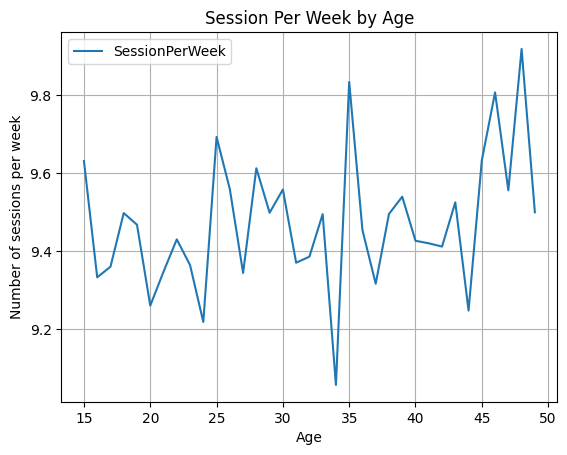

In [68]:
df_avg_age = df.groupby("Age").mean("SessionPerWeek").reset_index()
plt.plot(df_avg_age["Age"], df_avg_age["SessionsPerWeek"], label="SessionPerWeek")
plt.xlabel("Age")
plt.ylabel("Number of sessions per week")
plt.grid(True)
plt.title("Session Per Week by Age")
plt.legend()
plt.show()

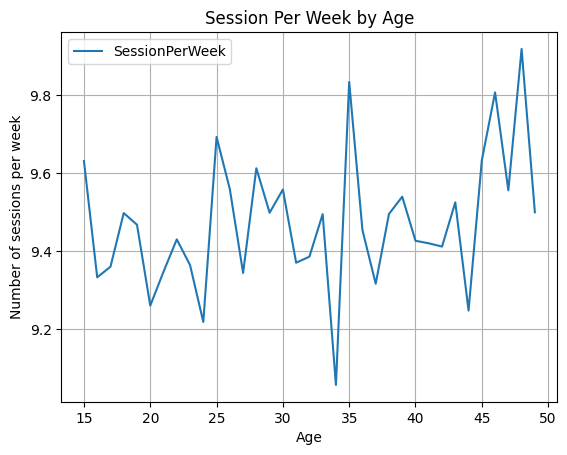

In [69]:
df_avg_age = df.groupby("Age").mean("SessionPerWeek").reset_index()
plt.plot(df_avg_age["Age"], df_avg_age["SessionsPerWeek"], label="SessionPerWeek")
plt.xlabel("Age")
plt.ylabel("Number of sessions per week")
plt.grid(True)
plt.title("Session Per Week by Age")
plt.legend()
plt.show()

## b) influence of '' type

## c) Seaborn Plots (Pair Plot, Heatmap, Correlation Matrix)

#4) ML Model

In [70]:
# target
target_column = 'EngagementLevel'

# seperate x y
X = df.drop(columns=[target_column, 'Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel_Low', 'EngagementLevel_Medium', 'EngagementLevel_High'])
y = df[target_column]

# split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# random forest
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8962158111652304

Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.85      0.88      2067
         Low       0.90      0.86      0.88      2065
      Medium       0.89      0.94      0.91      3875

    accuracy                           0.90      8007
   macro avg       0.90      0.88      0.89      8007
weighted avg       0.90      0.90      0.90      8007



In [71]:
# macro micro f1
report = classification_report(y_test, y_pred, output_dict=True)
macro_f1 = report['macro avg']['f1-score']
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Macro F1-score:", macro_f1)
print("Micro F1-score:", micro_f1)

Macro F1-score: 0.891103404154018
Micro F1-score: 0.8962158111652304


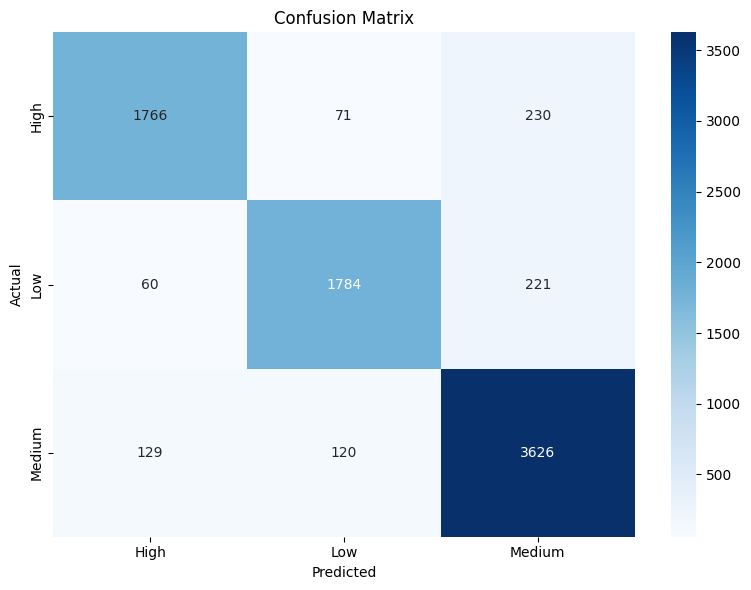

In [72]:
# ROC AUC
if len(np.unique(y)) == 2:
    auc = roc_auc_score(y_test, y_pred)
    print(f"\nROC-AUC Score: {auc:.3f}")

# confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# feature importance
importances = model.feature_importances_
feat_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


Top 15 features:

                      Feature  Importance
4             SessionsPerWeek    0.367906
5   AvgSessionDurationMinutes    0.295975
0                    PlayerID    0.056073
6                 PlayerLevel    0.054490
7        AchievementsUnlocked    0.050616
1                         Age    0.044186
2               PlayTimeHours    0.041052
13               Location_USA    0.007055
3             InGamePurchases    0.006899
19        GameDifficulty_Easy    0.006706
11            Location_Europe    0.006560
21      GameDifficulty_Medium    0.006276
14           GameGenre_Action    0.006016
18         GameGenre_Strategy    0.005952
16       GameGenre_Simulation    0.005859


/tmp/ipython-input-73-3392704133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


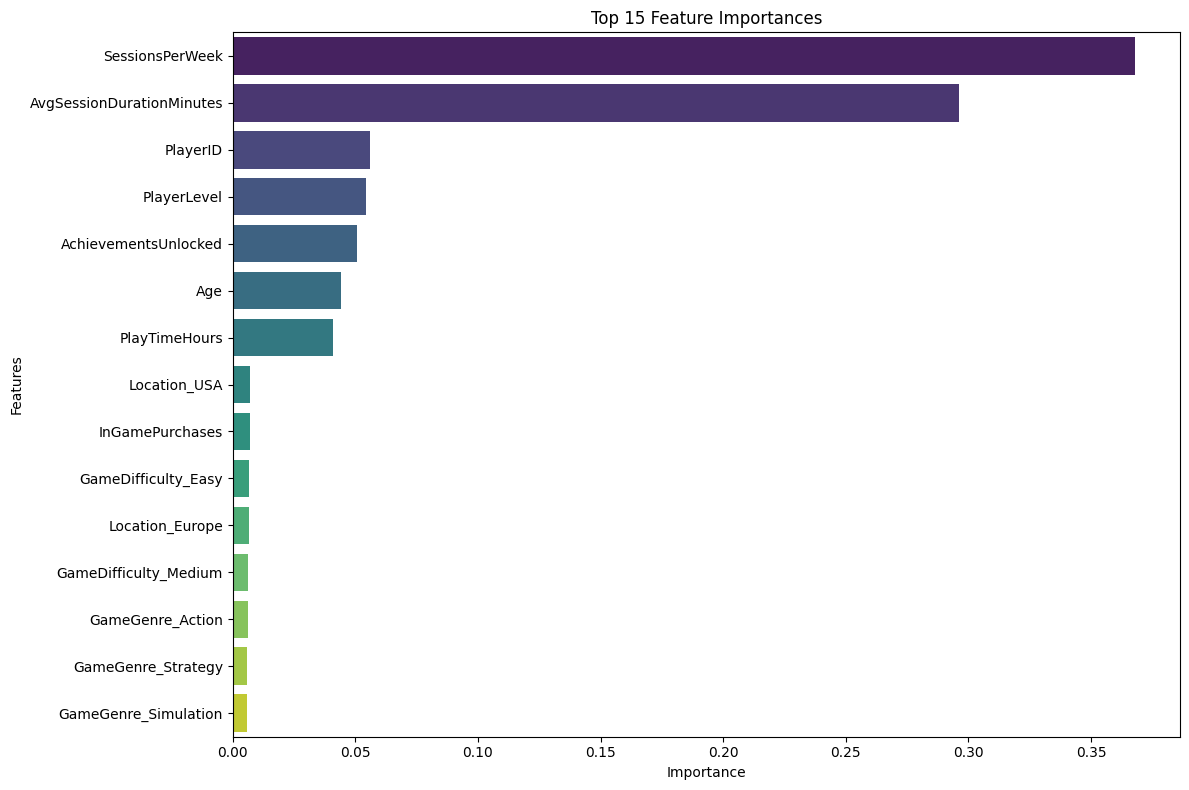


Cross-validation Accuracy: 0.899 (+/- 0.011)


In [73]:
# print
print("\nTop 15 features:\n")
print(importance_df.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

## b) correlation heatmap

## c) Graphique en courbe